# Table of Contents
[1-1. 데이터 로드 - '댓글합' as review_all](#bullet1)<br>
[1-2 데이터 로드 '전체합' as total_all](#bullet2)<br>
[2-1 유저의 장르별 리뷰 개수 피벗 테이블 생성 as table](#bullet3)<br>
[3. 장르별 리뷰 개수 합 및 차지 비중 계산 (review_all)](#bullet4)<br>
[4. 장르별 컨텐츠 개수 합 및 차지 비중 계산 (total_all)](#bullet5)<br>
[5. 장르별 리뷰 개수 많은순 정렬](#bullet6)<br>
[6. 장르별 리뷰 개수 countplot](#bullet7)<br>
[7. 장르별 리뷰 개수 distplot (분포)](#bullet8a)<br>
[8. 장르별 리뷰 개수 boxplot](#bullet9)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [2]:
pd.set_option('max_columns',None) #None, 칼럼은 다 보이게. row는 취향에 따라 'max_rows', None으로 하고 head로 조절

In [3]:
import warnings
warnings.filterwarnings('ignore')

## 1-1. 데이터 로드: '댓글합' as review_all<a class="anchor" id="bullet1"></a>

In [4]:
review_all = pd.read_csv('data/댓글합.csv', index_col = 0)
review_all.drop_duplicates(inplace=True)
review_all.head()

,nickname,rating,title,voice,author,review,created,publish,genre
0,유노창민,100,저스트 어 모멘트,이나리,이경화,잘들었습니다.,2020.11.06,탐,소설문학
1,나이스가이72,100,[단편] 헤엄치는 밤,최인영,한유주,내용 목소리 넘 좋습니다.,2020.10.29,미디어창비,소설문학
2,하브,100,[단편] 헤엄치는 밤,최인영,한유주,완전 내용도 장난 아니게 좋네요!! 그리고 목소리도 너무 좋아 집중해서 잘 들을 수...,2020.10.29,미디어창비,소설문학
3,양수,100,[단편] 헤엄치는 밤,최인영,한유주,빠져드는 목소리입니다^^,2020.10.29,미디어창비,소설문학
4,티씨지는부산더락,100,[단편] 헤엄치는 밤,최인영,한유주,목소리 너무 좋아요,2020.10.28,미디어창비,소설문학


In [5]:
print(review_all.shape)
#print(df.isnull().sum())
review_all.info()

(15528, 9)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 15528 entries, 0 to 15530
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   nickname  15528 non-null  object
 1   rating    15528 non-null  int64 
 2   title     15528 non-null  object
 3   voice     13245 non-null  object
 4   author    15416 non-null  object
 5   review    15477 non-null  object
 6   created   15528 non-null  object
 7   publish   15383 non-null  object
 8   genre     15528 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.2+ MB


## 1-2 데이터 로드 '전체합' as total_all<a class="anchor" id="bullet2"></a>

In [6]:
total_all = pd.read_csv('data/전체합.csv', index_col = 0)
total_all.head()

,title,voice,author,publish,genre
0,"매향리, 평화가 오다",이미나,"화성시(기획),전혜진(글),김준현(사진)",화성시,소설문학
1,[이유영 낭독] 다정한 유전 _작은책,이유영,강화길,아르테,소설문학
2,저스트 어 모멘트,이나리,이경화,탐,소설문학
3,사춘기라서 그래,조현정,이명랑,탐,소설문학
4,[단편] 헤엄치는 밤,최인영,한유주,미디어창비,소설문학


In [7]:
print(total_all.shape)
total_all.info()

(1723, 5)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1723 entries, 0 to 1722
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    1723 non-null   object
 1   voice    874 non-null    object
 2   author   1720 non-null   object
 3   publish  1722 non-null   object
 4   genre    1723 non-null   object
dtypes: object(5)
memory usage: 80.8+ KB


In [70]:
print(f"리뷰를 한번이라도 남긴 유저 수는 : {len(review_all.nickname.unique())}명")

리뷰를 한번이라도 남긴 유저 수는 : 4450명


## 2-1 유저의 장르별 리뷰 개수 피벗 테이블 생성 as table<a class="anchor" id="bullet3"></a>

In [8]:
table = pd.pivot_table(review_all, index='nickname', columns='genre', values='title', aggfunc='count')
table

genre,경제경영,소설문학,어린이동화,오디오북스,인문교양,자기계발
nickname,,,,,,
00young,NaN,NaN,NaN,1.0,NaN,NaN
015bc603,NaN,1.0,NaN,NaN,NaN,NaN
027,NaN,NaN,NaN,NaN,1.0,NaN
091222,NaN,NaN,3.0,NaN,NaN,NaN
09abc,NaN,2.0,NaN,NaN,1.0,2.0
...,...,...,...,...,...,...
히힛잉,NaN,7.0,NaN,NaN,1.0,1.0
힉스입자,NaN,NaN,3.0,NaN,1.0,1.0
힐데,NaN,NaN,NaN,1.0,NaN,NaN


In [9]:
table.loc[:, 'Total'] = table.sum(axis=1)
table

genre,경제경영,소설문학,어린이동화,오디오북스,인문교양,자기계발,Total
nickname,,,,,,,
00young,NaN,NaN,NaN,1.0,NaN,NaN,1.0
015bc603,NaN,1.0,NaN,NaN,NaN,NaN,1.0
027,NaN,NaN,NaN,NaN,1.0,NaN,1.0
091222,NaN,NaN,3.0,NaN,NaN,NaN,3.0
09abc,NaN,2.0,NaN,NaN,1.0,2.0,5.0
...,...,...,...,...,...,...,...
히힛잉,NaN,7.0,NaN,NaN,1.0,1.0,9.0
힉스입자,NaN,NaN,3.0,NaN,1.0,1.0,5.0
힐데,NaN,NaN,NaN,1.0,NaN,NaN,1.0


(array([3.677e+03, 2.590e+02, 1.270e+02, 1.090e+02, 7.700e+01, 6.900e+01,
        3.100e+01, 2.600e+01, 1.600e+01, 1.100e+01, 1.300e+01, 8.000e+00,
        1.100e+01, 8.000e+00, 4.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([ 1. ,  4.2,  7.4, 10.6, 13.8, 17. , 20.2, 23.4, 26.6, 29.8, 33. ,
        36.2, 39.4, 42.6, 45.8, 49. , 52.2, 55.4, 58.6, 61.8, 65. ]),
 <a list of 20 Patch objects>)

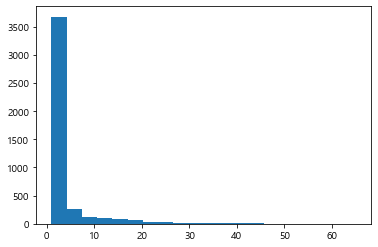

In [80]:
plt.hist(data=table, x='Total', bins=20)

In [10]:
table.describe()

genre,경제경영,소설문학,어린이동화,오디오북스,인문교양,자기계발,Total
count,141.000000,1898.000000,591.000000,2271.000000,934.000000,993.000000,4450.000000
mean,1.014184,3.902002,2.610829,1.299428,1.480728,2.116818,3.489438
std,0.118672,4.868420,1.108129,0.844362,0.800022,1.525472,6.101487
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,5.000000,3.000000,1.000000,2.000000,3.000000,3.000000
max,2.000000,41.000000,8.000000,8.000000,4.000000,7.000000,65.000000


## 3. 장르별 리뷰 개수 합 및 차지 비중 계산 <a class="anchor" id="bullet4"></a>

In [11]:
review_sum_table = table.sum(axis=0).to_frame()
review_sum_table

,0
genre,
경제경영,143.0
소설문학,7406.0
어린이동화,1543.0
오디오북스,2951.0
인문교양,1383.0
자기계발,2102.0
Total,15528.0


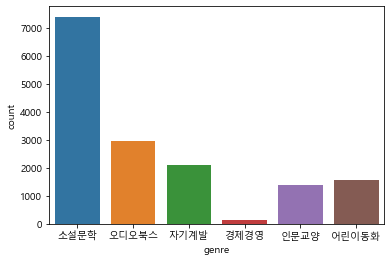

In [43]:
sns.countplot(data=review_all, x='genre')

In [12]:
print(f"전체 리뷰 중 경제경영 리뷰의 비중은 {review_sum_table.loc['경제경영'].values*100/review_sum_table.loc['Total'].values}%")
print(f"전체 리뷰 중 소설문학 리뷰의 비중은 {review_sum_table.loc['소설문학'].values*100/review_sum_table.loc['Total'].values}%")
print(f"전체 리뷰 중 어린이동화 리뷰의 비중은 {review_sum_table.loc['어린이동화'].values*100 / review_sum_table.loc['Total'].values}%")
print(f"전체 리뷰 중 오디오북스 리뷰의 비중은 {review_sum_table.loc['오디오북스'].values*100/ review_sum_table.loc['Total'].values}%")
print(f"전체 리뷰 중 인문교양 리뷰의 비중은 {review_sum_table.loc['인문교양'].values*100/review_sum_table.loc['Total'].values}%")
print(f"전체 리뷰 중 자기계발 리뷰의 비중은 {review_sum_table.loc['자기계발'].values*100/review_sum_table.loc['Total'].values}%")

전체 리뷰 중 경제경영 리뷰의 비중은 [0.92091705]%
전체 리뷰 중 소설문학 리뷰의 비중은 [47.69448738]%
전체 리뷰 중 어린이동화 리뷰의 비중은 [9.9368882]%
전체 리뷰 중 오디오북스 리뷰의 비중은 [19.00437919]%
전체 리뷰 중 인문교양 리뷰의 비중은 [8.9064915]%
전체 리뷰 중 자기계발 리뷰의 비중은 [13.53683668]%


## 4. 장르별 컨텐츠 개수 합 및 차지 비중 계산 (total_all)<a class="anchor" id="bullet5"></a>

In [13]:
table_all = pd.pivot_table(total_all, columns='genre', values='title', aggfunc='count')
table_all

genre,경제경영,소설문학,어린이동화,역사,오디오북스,인문교양,자기계발
title,15,476,727,10,348,115,32


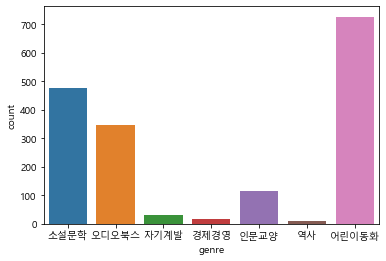

In [64]:
sns.countplot(data=total_all, x='genre')

In [14]:
table_all.loc[:, 'Total'] = table_all.sum(axis=1)
table_all

genre,경제경영,소설문학,어린이동화,역사,오디오북스,인문교양,자기계발,Total
title,15,476,727,10,348,115,32,1723


In [15]:
print(f"전체 컨텐츠 중 경제경영 컨텐츠의 비중은 {table_all['경제경영'].values*100/table_all['Total'].values}%")
print(f"전체 컨텐츠 중 소설문학 컨텐츠의 비중은 {table_all['소설문학'].values*100/table_all['Total'].values}%")
print(f"전체 컨텐츠 중 어린이동화 컨텐츠의 비중은 {table_all['어린이동화'].values*100/table_all['Total'].values}%")
print(f"전체 컨텐츠 중 역사 컨텐츠의 비중은 {table_all['역사'].values*100/table_all['Total'].values}%")
print(f"전체 컨텐츠 중 오디오북스 컨텐츠의 비중은 {table_all['오디오북스'].values*100/table_all['Total'].values}%")
print(f"전체 컨텐츠 중 인문교양 컨텐츠의 비중은 {table_all['인문교양'].values*100/table_all['Total'].values}%")
print(f"전체 컨텐츠 중 자기계발 컨텐츠의 비중은 {table_all['자기계발'].values*100/table_all['Total'].values}%")

전체 컨텐츠 중 경제경영 컨텐츠의 비중은 [0.87057458]%
전체 컨텐츠 중 소설문학 컨텐츠의 비중은 [27.62623331]%
전체 컨텐츠 중 어린이동화 컨텐츠의 비중은 [42.19384794]%
전체 컨텐츠 중 역사 컨텐츠의 비중은 [0.58038305]%
전체 컨텐츠 중 오디오북스 컨텐츠의 비중은 [20.19733024]%
전체 컨텐츠 중 인문교양 컨텐츠의 비중은 [6.67440511]%
전체 컨텐츠 중 자기계발 컨텐츠의 비중은 [1.85722577]%


## 5. 장르별 리뷰 개수 많은순 정렬<a class="anchor" id="bullet6"></a>

### Total순 정렬

In [16]:
table_sorted_by_sum = table.sort_values(by='Total', ascending=False)
table_sorted_by_sum.head(10)

genre,경제경영,소설문학,어린이동화,오디오북스,인문교양,자기계발,Total
nickname,,,,,,,
마임,1.0,41.0,5.0,8.0,3.0,7.0,65.0
대룡리말바위,1.0,35.0,4.0,3.0,4.0,7.0,54.0
고트프리트,1.0,35.0,4.0,2.0,4.0,6.0,52.0
swagger,1.0,32.0,5.0,2.0,4.0,7.0,51.0
kwonjkim,NaN,26.0,5.0,6.0,4.0,6.0,47.0
initialj,NaN,28.0,3.0,7.0,3.0,5.0,46.0
미다진구,1.0,30.0,4.0,1.0,4.0,6.0,46.0
코끼리311,NaN,30.0,4.0,2.0,3.0,7.0,46.0
handrake12,1.0,26.0,4.0,4.0,4.0,6.0,45.0


<div class="alert alert-warning">
1. 명예의 전당 탑텐은 전체 리뷰의 반 이상, 높게는 2/3까지 소설문학에 편중 <br>
2. 나머지 장르도 다른 멤버와 비슷한 개수의 리뷰를 작성한 것이 눈에 띈다 <br>
3. 전체 리뷰 내 장르 분포와 비교했을 때 <br>
    3-1 경제경영: 전체는 1% 미만인데 여기서는 2% 정도, 열심히 쓰시네들 <br>
    3-2 소설문학: 전체 47%인데 여기서는 더 높음! 헤비유저들은 소설 많이 들음 <br>
    3-3 어린이문학: 전체 10%와 비슷함 <br>
    3-4 오디오북스: 전체 20%인데 여긴 10%: 이벤트가 있어야만 리뷰를 쓰는 사람들과 이벤트가 없어도 리뷰를 쓰느 사람들의 그룹이 나눠진다면 Hall of Fame은 후자일 것 같다. 텍스트 분석이 가장 먼저 이루어져야할 장르. 이벤트 관련 키워드가 들어가있는지 확인해야겠다. <br>
    3-5 인문교양: 전체 9%, 얼추 비슷 <br>
    3-6 자기계발: 전체 13%, 얼추 비슷
</div>

In [73]:
table_sorted_by_sum.Total.describe()

count    4450.000000
mean        3.489438
std         6.101487
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max        65.000000
Name: Total, dtype: float64

In [74]:
table_sorted_by_sum['Total'].quantile(np.arange(0.2, 0.4, 0.05))

0.20    1.0
0.25    1.0
0.30    1.0
0.35    1.0
Name: Total, dtype: float64

### 경제경영순 정렬

In [17]:
table_sorted_by_econ = table.sort_values(by=['경제경영','Total'], ascending=False)
table_sorted_by_econ.head(10)

genre,경제경영,소설문학,어린이동화,오디오북스,인문교양,자기계발,Total
nickname,,,,,,,
민주진보,2.0,15.0,2.0,NaN,NaN,1.0,20.0
keniy,2.0,NaN,NaN,NaN,NaN,NaN,2.0
마임,1.0,41.0,5.0,8.0,3.0,7.0,65.0
대룡리말바위,1.0,35.0,4.0,3.0,4.0,7.0,54.0
고트프리트,1.0,35.0,4.0,2.0,4.0,6.0,52.0
swagger,1.0,32.0,5.0,2.0,4.0,7.0,51.0
미다진구,1.0,30.0,4.0,1.0,4.0,6.0,46.0
handrake12,1.0,26.0,4.0,4.0,4.0,6.0,45.0
던힐발란스,1.0,23.0,5.0,6.0,4.0,6.0,45.0


### 소설문학순 정렬

In [18]:
table_sorted_by_lit = table.sort_values(by=['소설문학', 'Total'], ascending=False)
table_sorted_by_lit.head(10)

genre,경제경영,소설문학,어린이동화,오디오북스,인문교양,자기계발,Total
nickname,,,,,,,
마임,1.0,41.0,5.0,8.0,3.0,7.0,65.0
대룡리말바위,1.0,35.0,4.0,3.0,4.0,7.0,54.0
고트프리트,1.0,35.0,4.0,2.0,4.0,6.0,52.0
swagger,1.0,32.0,5.0,2.0,4.0,7.0,51.0
겁나빠른달팽이,1.0,32.0,2.0,NaN,2.0,6.0,43.0
미다진구,1.0,30.0,4.0,1.0,4.0,6.0,46.0
코끼리311,NaN,30.0,4.0,2.0,3.0,7.0,46.0
비내림,1.0,29.0,4.0,NaN,NaN,6.0,40.0
initialj,NaN,28.0,3.0,7.0,3.0,5.0,46.0


### 어린이동화순 정렬

In [19]:
table_sorted_by_children = table.sort_values(by=['어린이동화', 'Total'], ascending=False)
table_sorted_by_children.head(10)

genre,경제경영,소설문학,어린이동화,오디오북스,인문교양,자기계발,Total
nickname,,,,,,,
쭈루쭈루쭈루,NaN,NaN,8.0,NaN,1.0,NaN,9.0
소시앓이,NaN,NaN,7.0,NaN,NaN,NaN,7.0
마임,1.0,41.0,5.0,8.0,3.0,7.0,65.0
swagger,1.0,32.0,5.0,2.0,4.0,7.0,51.0
kwonjkim,NaN,26.0,5.0,6.0,4.0,6.0,47.0
던힐발란스,1.0,23.0,5.0,6.0,4.0,6.0,45.0
denty77,1.0,27.0,5.0,6.0,3.0,2.0,44.0
gianis,1.0,26.0,5.0,2.0,3.0,7.0,44.0
YSCHOI17,1.0,22.0,5.0,4.0,3.0,6.0,41.0


### 오디오북스순 정렬

In [20]:
table_sorted_by_audiobooks = table.sort_values(by=['오디오북스', 'Total'], ascending=False)
table_sorted_by_audiobooks.head(10)

genre,경제경영,소설문학,어린이동화,오디오북스,인문교양,자기계발,Total
nickname,,,,,,,
마임,1.0,41.0,5.0,8.0,3.0,7.0,65.0
eunnicho,1.0,14.0,1.0,8.0,2.0,2.0,28.0
신중하고겸손하게,NaN,NaN,NaN,8.0,1.0,NaN,9.0
initialj,NaN,28.0,3.0,7.0,3.0,5.0,46.0
James30,NaN,13.0,NaN,7.0,1.0,NaN,21.0
궤물,NaN,4.0,NaN,7.0,1.0,4.0,16.0
레드퀸,NaN,NaN,NaN,7.0,NaN,NaN,7.0
kwonjkim,NaN,26.0,5.0,6.0,4.0,6.0,47.0
던힐발란스,1.0,23.0,5.0,6.0,4.0,6.0,45.0


### 인문교양순 정렬

In [21]:
table_sorted_by_humanities = table.sort_values(by=['인문교양', 'Total'], ascending=False)
table_sorted_by_humanities.head(10)

genre,경제경영,소설문학,어린이동화,오디오북스,인문교양,자기계발,Total
nickname,,,,,,,
대룡리말바위,1.0,35.0,4.0,3.0,4.0,7.0,54.0
고트프리트,1.0,35.0,4.0,2.0,4.0,6.0,52.0
swagger,1.0,32.0,5.0,2.0,4.0,7.0,51.0
kwonjkim,NaN,26.0,5.0,6.0,4.0,6.0,47.0
미다진구,1.0,30.0,4.0,1.0,4.0,6.0,46.0
handrake12,1.0,26.0,4.0,4.0,4.0,6.0,45.0
던힐발란스,1.0,23.0,5.0,6.0,4.0,6.0,45.0
쌀까마,1.0,27.0,4.0,3.0,4.0,6.0,45.0
hamsik,NaN,25.0,4.0,4.0,4.0,6.0,43.0


### 자기계발순 정렬

In [22]:
table_sorted_by_selfdev = table.sort_values(by=['자기계발', 'Total'], ascending=False)
table_sorted_by_selfdev.head(10)

genre,경제경영,소설문학,어린이동화,오디오북스,인문교양,자기계발,Total
nickname,,,,,,,
마임,1.0,41.0,5.0,8.0,3.0,7.0,65.0
대룡리말바위,1.0,35.0,4.0,3.0,4.0,7.0,54.0
swagger,1.0,32.0,5.0,2.0,4.0,7.0,51.0
코끼리311,NaN,30.0,4.0,2.0,3.0,7.0,46.0
gianis,1.0,26.0,5.0,2.0,3.0,7.0,44.0
홍홍37,1.0,23.0,4.0,2.0,4.0,7.0,41.0
훈00,1.0,22.0,3.0,3.0,4.0,7.0,40.0
hoot720,NaN,22.0,4.0,2.0,3.0,7.0,38.0
네이처파운드,1.0,19.0,4.0,2.0,4.0,7.0,37.0


## 6. 장르별 리뷰 개수 countplot<a class="anchor" id="bullet7"></a>
### y축: <장르>의 컨텐츠를 n개 리뷰한 유저의 수

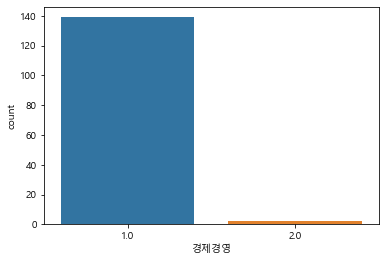

In [23]:
sns.countplot(x = '경제경영', data=table)

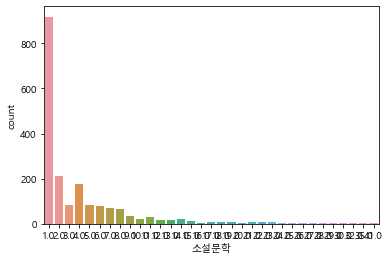

In [24]:
sns.countplot(x = '소설문학', data=table)

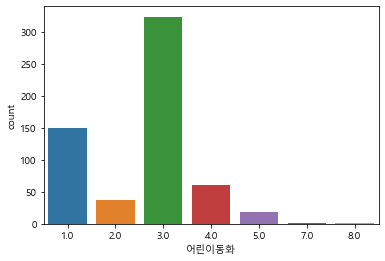

In [25]:
sns.countplot(x = '어린이동화', data=table)

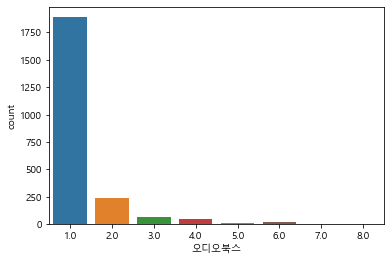

In [26]:
sns.countplot(x = '오디오북스', data=table)

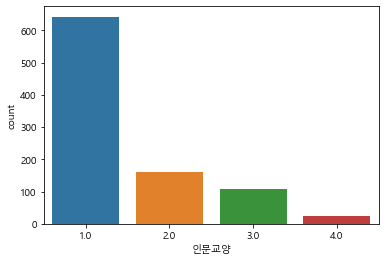

In [27]:
sns.countplot(x = '인문교양', data=table)

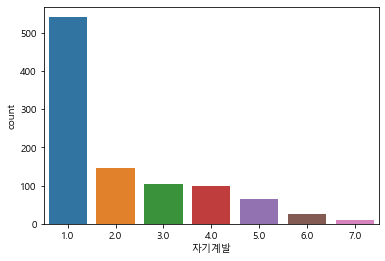

In [28]:
sns.countplot(x = '자기계발', data=table)

## 7. 장르별 리뷰 개수별 유저 distplot (분포)<a class="anchor" id="bullet8"></a>

In [ ]:
sns.distplot(table['경제경영'])

In [ ]:
sns.distplot(table['소설문학'])

In [ ]:
sns.distplot(table['어린이동화'])

In [ ]:
sns.distplot(table['오디오북스'])

In [ ]:
sns.distplot(table['인문교양'])

In [ ]:
sns.distplot(table['자기계발'])

## 8. 장르별 리뷰 개수별 유저 수 boxplot<a class="anchor" id="bullet9"></a>

In [ ]:
sns.boxplot(x=table['경제경영'])

In [ ]:
sns.boxplot(x=table['소설문학'])

In [ ]:
sns.boxplot(x=table['어린이동화'])

In [ ]:
sns.boxplot(x=table['오디오북스'])

In [ ]:
sns.boxplot(x=table['인문교양'])

In [ ]:
sns.boxplot(x=table['자기계발'])

## 9. 장르별 컨텐츠의 리뷰 많은 순 정렬

In [ ]:
# review_all 경제경영 genre만 가지고,
# 책 제목 리뷰 개수  
# 투자1      7

In [29]:
reviewed_econ = review_all[review_all['genre'].str.contains('경제경영')]
reviewed_econ

,nickname,rating,title,voice,author,review,created,publish,genre
12459,bluejays19,10,사람의 힘 (요약),장병관,윤석금,잘못된 경영으로 웅진그룹 골로 간 게 언제인데\r\n이런 책을 오디오북에 소개하나?,2020.09.14,리더스북,경제경영
12460,풀향기5016,70,사람의 힘 (요약),장병관,윤석금,웅진! 오래전 아이들 꾸러기곰돌이란 책부터구입하였습니다ㆍ그시절 저도잠깐 웅진아이큐란...,2019.10.28,리더스북,경제경영
12461,keniy,100,시골 카페에서 경영을 찾다,"은정,김용식,장병관",다카이 나오유키,잘 듣었습니당~~,2019.07.11,(주)도서출판 길벗,경제경영
12462,okyy7928,100,모두 거짓말을 한다,장병관,세스 스티븐스 다비도위츠,기대합니다,2019.08.16,더퀘스트,경제경영
12463,silveerr,90,모두 거짓말을 한다,장병관,세스 스티븐스 다비도위츠,흥미로워요,2019.08.15,더퀘스트,경제경영
...,...,...,...,...,...,...,...,...,...
12597,estyu,90,모두 거짓말을 한다,장병관,세스 스티븐스 다비도위츠,잘들을께요-!!,2019.08.09,더퀘스트,경제경영
12598,네이처파운드,100,모두 거짓말을 한다,장병관,세스 스티븐스 다비도위츠,잘듣겠습니다,2019.08.09,더퀘스트,경제경영
12599,꿈을볶는카페커피베이,100,모두 거짓말을 한다,장병관,세스 스티븐스 다비도위츠,잘들을게요,2019.08.09,더퀘스트,경제경영
12600,keniy,100,모두 거짓말을 한다,장병관,세스 스티븐스 다비도위츠,좋은 정보 감사합니다~,2019.07.11,더퀘스트,경제경영


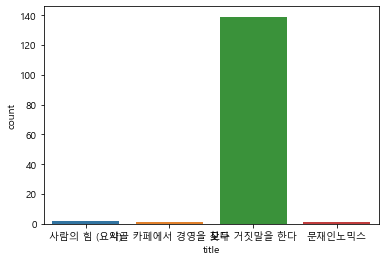

In [44]:
sns.countplot(data=reviewed_econ, x='title')

In [30]:
reviewed_econ_count = reviewed_econ.groupby(['title']).agg({'rating':'count'}).sort_values(by='rating', ascending=False)
reviewed_econ_count

,rating
title,
모두 거짓말을 한다,139
사람의 힘 (요약),2
문재인노믹스,1
시골 카페에서 경영을 찾다,1


(array([3., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([  1. ,  14.8,  28.6,  42.4,  56.2,  70. ,  83.8,  97.6, 111.4,
        125.2, 139. ]),
 <a list of 10 Patch objects>)

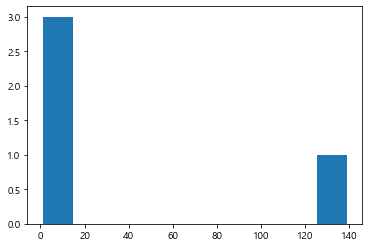

In [84]:
plt.hist(data=reviewed_econ_count, x='rating')

In [31]:
reviewed_lit = review_all[review_all['genre'].str.contains('소설문학')]
reviewed_lit

,nickname,rating,title,voice,author,review,created,publish,genre
0,유노창민,100,저스트 어 모멘트,이나리,이경화,잘들었습니다.,2020.11.06,탐,소설문학
1,나이스가이72,100,[단편] 헤엄치는 밤,최인영,한유주,내용 목소리 넘 좋습니다.,2020.10.29,미디어창비,소설문학
2,하브,100,[단편] 헤엄치는 밤,최인영,한유주,완전 내용도 장난 아니게 좋네요!! 그리고 목소리도 너무 좋아 집중해서 잘 들을 수...,2020.10.29,미디어창비,소설문학
3,양수,100,[단편] 헤엄치는 밤,최인영,한유주,빠져드는 목소리입니다^^,2020.10.29,미디어창비,소설문학
4,티씨지는부산더락,100,[단편] 헤엄치는 밤,최인영,한유주,목소리 너무 좋아요,2020.10.28,미디어창비,소설문학
...,...,...,...,...,...,...,...,...,...
7401,아모치온,100,당신의 슬픔을 훔칠게요,김현,김현,NaN,2019.01.18,미디어창비,소설문학
7402,키키49,100,당신의 슬픔을 훔칠게요,김현,김현,요즘 사는게 회의적이엿는뎅~ 다시 소녀의 감성이 되어가네요~순수햇던 그 시절이 맘속...,2019.01.07,미디어창비,소설문학
7403,팟으로만든떡,60,당신의 슬픔을 훔칠게요,김현,김현,좋네요,2019.01.03,미디어창비,소설문학
7404,AKB48사토미나미,100,당신의 슬픔을 훔칠게요,김현,김현,NaN,2018.12.27,미디어창비,소설문학


In [32]:
reviewed_lit_count = reviewed_lit.groupby(['title']).agg({'rating':'count'}).sort_values(by='rating', ascending=False)
reviewed_lit_count.head(40)

,rating
title,
담배만이 우리 세상,480
[한예리 낭독] 안락 _ 작은책,407
살고 싶다는 농담,392
당신의 슬픔을 훔칠게요,348
어쩌면 내가 가장 듣고 싶었던 말 (요약),345
블랙코미디,343
[성진환 낭독] 나조차 나를 사랑하지 못하고,333
[윤덕원 낭독] 해피 아포칼립스! _ 작은책,267
좀머 씨 이야기,266


(array([73., 14.,  9.,  3.,  4.,  4.,  1.,  3.,  2.,  1.]),
 array([  1. ,  48.9,  96.8, 144.7, 192.6, 240.5, 288.4, 336.3, 384.2,
        432.1, 480. ]),
 <a list of 10 Patch objects>)

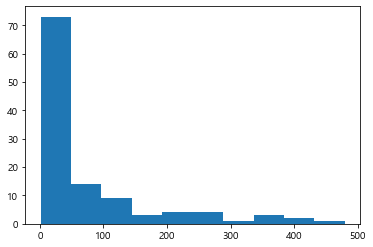

In [62]:
plt.hist(data=reviewed_lit_count, x='rating', bins=10)

In [33]:
reviewed_lit_count.describe()

,rating
count,114.000000
mean,64.964912
std,105.696420
min,1.000000
25%,1.000000
50%,6.000000
75%,72.000000
max,480.000000


In [34]:
reviewed_children = review_all[review_all['genre'].str.contains('어린이동화')]
reviewed_children

,nickname,rating,title,voice,author,review,created,publish,genre
13985,쭈루쭈루쭈루,50,어느 날 우리 반에 공룡이 전학 왔다,이지현,서지원,기대가 됩니다,2020.09.26,길벗스쿨,어린이동화
13986,하루유,10,임진록,NaN,김종광,"설마 2시간 8분짜리가 9,900원은 아닌거죠? 구매해서 듣고나니 너무 허무하네요",2019.04.08,창비,어린이동화
13987,pink9964,90,오세암,NaN,정채봉,영화로 본적 있는데 보는 동안 눈물이 나오는 영화 오디오 북으로도 나왔네요 감동이었어요,2019.04.02,창비,어린이동화
13988,유노창민,100,홍당무,"심규영,장세윤",쥘 르나르,잘들었습니다.,2020.11.06,시공주니어,어린이동화
13990,쭈루쭈루쭈루,100,내 꿈은 누가 정해요?,김소형,김효,기데되네요,2020.09.22,풀빛미디어,어린이동화
...,...,...,...,...,...,...,...,...,...
15524,kay333,100,명작동화 영한대역 I,"박미경,손선희",그림 형제,"유명한 그림 형제 동화를 한국어ᆞ영어로 동시에 듣고, 색다른 정보도 알게 되네요. ^^",2019.07.05,왓북,어린이동화
15525,자연에서,100,명작동화 영한대역 I,"박미경,손선희",그림 형제,아이 잠자리에서 영한대역으로 틀어주면 좋을거 같아요. 영어 난이도가 쉽진 않지만 자...,2019.07.01,왓북,어린이동화
15526,후후후크,90,[단편] 햇볕 동동 구리 동동,NaN,윤기현,애들 재울때 들으려고 샀는데\r\n아빠가 더 재밌네요 옛날 생각도 나고,2020.01.19,창비,어린이동화
15529,소민맘,100,마법사 똥맨,NaN,송언,재밌어요,2019.12.19,창비,어린이동화


In [35]:
reviewed_children_count = reviewed_children.groupby(['title']).agg({'rating':'count'}).sort_values(by='rating', ascending=False)
reviewed_children_count

,rating
title,
[EBS 세계문학전집] 15소년 표류기,472
[EBS 세계문학전집] 걸리버 여행기,424
[EBS 세계문학전집] 장발장,418
까칠한 아이(성우 낭독 버전),145
까칠한 아이(AI 음성합성 버전),61
[EBS 세계문학전집] 아라비안나이트,4
[EBS 세계문학전집] 지킬박사와 하이드,3
[EBS 세계문학전집] 그리스로마 신화,2
명작동화 영한대역 I,2


(array([16.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  2.,  1.]),
 array([  1. ,  48.1,  95.2, 142.3, 189.4, 236.5, 283.6, 330.7, 377.8,
        424.9, 472. ]),
 <a list of 10 Patch objects>)

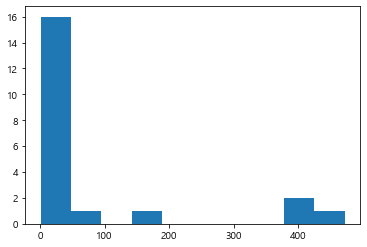

In [54]:
plt.hist(data=reviewed_children_count, x='rating', bins=10)

In [36]:
reviewed_audiobooks = review_all[review_all['genre'].str.contains('오디오북스')]
reviewed_audiobooks

,nickname,rating,title,voice,author,review,created,publish,genre
7406,로신123,100,빨강머리 앤 : 에이번리 이야기,이지혜,루시 모드 몽고메리,3권은 언제쯤 나올까요?,2019.11.17,커뮤니케이션북스,오디오북스
7407,liu43220,80,빨강머리 앤 : 에이번리 이야기,이지혜,루시 모드 몽고메리,앤 시리즈 8권이 다 번역되는 그날까지 기다립니다.,2019.09.18,커뮤니케이션북스,오디오북스
7408,이지니니지,100,빨강머리 앤 : 에이번리 이야기,이지혜,루시 모드 몽고메리,"빨간머리앤 시리즈 다 읽어보고 싶었는데, 이렇게 들을 수 있으니 너무 좋아요. 다음...",2019.06.27,커뮤니케이션북스,오디오북스
7409,miltaiji,90,빨강머리 앤 : 에이번리 이야기,이지혜,루시 모드 몽고메리,이지혜님 목소리가좋아요,2019.06.14,커뮤니케이션북스,오디오북스
7410,peaceap,100,빨강머리 앤 : 에이번리 이야기,이지혜,루시 모드 몽고메리,좋아요 잘들을께요,2019.06.08,커뮤니케이션북스,오디오북스
...,...,...,...,...,...,...,...,...,...
10352,성난환소,100,이원승이 읽는 현진건의 운수 좋은 날,이원승,현진건,"유독 ""운수 좋은 날""을 좋아하는지라 책으로 수십번에 유튜브에 떠도는 많은 오디오북...",2019.03.20,커뮤니케이션북스,오디오북스
10353,의식혁명빵,100,윤석화가 읽는 나혜석의 경희,윤석화,나혜석,소리로 들으니 훨씬 감정이입이 잘 됩니다. 윤석화님이 경희의 심리적 갈등을 절절하게...,2019.02.06,커뮤니케이션북스,오디오북스
10354,빌어먹을,90,윤석화가 읽는 나혜석의 경희,윤석화,나혜석,"무료로 들을 수 있어서 좋았다.하지만,오래된 소설이라 그런가 생경한 단어가 너무 많았다.",2019.02.05,커뮤니케이션북스,오디오북스
10355,haha10101,100,윤석화가 읽는 나혜석의 경희,윤석화,나혜석,너무 좋아요. 나혜석 작품 많이 읽어주세요!!,2019.02.02,커뮤니케이션북스,오디오북스


In [37]:
reviewed_audiobooks_count = reviewed_audiobooks.groupby(['title']).agg({'rating':'count'}).sort_values(by='rating', ascending=False)
reviewed_audiobooks_count

,rating
title,
최민식이 읽는 이범선의 오발탄,1445
빨강머리 앤 : 초록지붕 집 이야기,312
빨강머리 앤 : 에이번리 이야기,231
문성근이 읽는 박태원의 소설가 구보 씨의 일일,212
[세계환상문학선] 오스카 와일드의 환상문학선,136
"100인의 배우, 우리 문학을 읽다",112
문소리가 읽는 송기숙의 몽기미 풍경,107
예지원이 읽는 정비석의 성황당,86
이지혜가 읽는 주요섭의 사랑손님과 어머니,78


(array([29.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([1.0000e+00, 1.4540e+02, 2.8980e+02, 4.3420e+02, 5.7860e+02,
        7.2300e+02, 8.6740e+02, 1.0118e+03, 1.1562e+03, 1.3006e+03,
        1.4450e+03]),
 <a list of 10 Patch objects>)

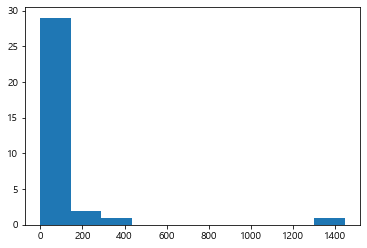

In [55]:
plt.hist(data=reviewed_audiobooks_count, x='rating', bins=10)

In [38]:
reviewed_humanities = review_all[review_all['genre'].str.contains('인문교양')]
reviewed_humanities

,nickname,rating,title,voice,author,review,created,publish,genre
12602,Beagood14,100,잠자리 대화의 기적,이예은,김동화,말 재주라고는 하나도 없는 엄마였어요. 뭔가를 시도하기 전에 늘 고민만 하고마는 그...,2020.11.12,서사원 주식회사,인문교양
12603,에밀리채현맘,100,잠자리 대화의 기적,이예은,김동화,아이와 무슨 대화를 할지 너뮤도 막막했을때 알게된 책\r\n어떻게 이런 상상력을 발...,2020.11.12,서사원 주식회사,인문교양
12604,극복이정우,100,잠자리 대화의 기적,이예은,김동화,사실 처음엔 딱딱 떨어지지 않는 가이드에 조금 당황스러웠던 적도 분명 있었다. 눈앞...,2020.11.11,서사원 주식회사,인문교양
12605,goodshow03,100,잠자리 대화의 기적,이예은,김동화,아이와이 대화를 통해서 아이의 변화된 모습을 눈으로보고 마음으로 느꼈습니다.그전에 ...,2020.11.10,서사원 주식회사,인문교양
12606,에너지오드리,100,잠자리 대화의 기적,이예은,김동화,시간순서만 생각하는 타임테이블로 가득찼던 저에게 감정과 스토리를 선물해주어 고마워요...,2020.11.10,서사원 주식회사,인문교양
...,...,...,...,...,...,...,...,...,...
13980,한우111,90,사기를 읽다,김영수,김영수,사기 험한 세상의 길잡이,2019.05.10,유유,인문교양
13981,신중하고겸손하게,100,사기를 읽다,김영수,김영수,꼭 읽어야될책으로 생각되어지는 사기 사마천의 각고의노력으로 만들어진책 해석이 궁금합니다,2019.05.10,유유,인문교양
13982,니스테르,100,사기를 읽다,김영수,김영수,기대됩니다,2019.05.10,유유,인문교양
13983,iy56,80,사기를 읽다,김영수,김영수,예전에 관련책을 보고 알게되었습니다 좋은 방송이 될거라 믿습니다,2019.05.10,유유,인문교양


In [39]:
reviewed_humanities_count = reviewed_humanities.groupby(['title']).agg({'rating':'count'}).sort_values(by='rating', ascending=False)
reviewed_humanities_count

,rating
title,
어른이 되면 괜찮을 줄 알았다,530
열하일기 첫걸음,352
세계는 왜 싸우는가,314
사기를 읽다,179
잠자리 대화의 기적,6
영리한 아이가 위험하다,1
"조선 최고의 문장, 이덕무를 읽다",1


(array([3., 0., 0., 1., 0., 1., 1., 0., 0., 1.]),
 array([  1. ,  53.9, 106.8, 159.7, 212.6, 265.5, 318.4, 371.3, 424.2,
        477.1, 530. ]),
 <a list of 10 Patch objects>)

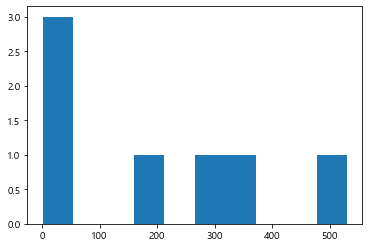

In [56]:
plt.hist(data=reviewed_humanities_count, x='rating', bins=10)

In [40]:
reviewed_selfdev = review_all[review_all['genre'].str.contains('자기계발')]
reviewed_selfdev

,nickname,rating,title,voice,author,review,created,publish,genre
10357,파진찬어른,100,나는 왠지 대박날 것만 같아!,손정현,손정현,필모보니깐 후덜덜하네요,2020.10.15,이은북,자기계발
10358,greathogoo,100,나는 왠지 대박날 것만 같아!,손정현,손정현,재미있네요 ^^,2020.10.15,이은북,자기계발
10359,짱구인생,100,나는 왠지 대박날 것만 같아!,손정현,손정현,잘 들었어요^^ 재밌네요,2020.10.15,이은북,자기계발
10360,성석동달인손세차,100,나는 왠지 대박날 것만 같아!,손정현,손정현,잘들었습니다 ^^,2020.10.15,이은북,자기계발
10361,시즈루,100,나는 왠지 대박날 것만 같아!,손정현,손정현,저자가 후배지망작가들에 대한 애정이 느껴지네요,2020.10.15,이은북,자기계발
...,...,...,...,...,...,...,...,...,...
12454,hearum,100,해외영업으로 먹고살기,김명철,노정엽,재밌고 내용이 알차네요~~ 굿!!!,2019.01.30,왓북,자기계발
12455,팟콩,10,속기사로 먹고살기,정상은,손효진,속기사 좋아유,2019.02.08,왓북,자기계발
12456,탑코리아,100,속기사로 먹고살기,정상은,손효진,속기사에 대해 궁금했었는데 많은 도움이 되었습니다.,2019.01.30,왓북,자기계발
12457,hearum,100,속기사로 먹고살기,정상은,손효진,직업의 신세계를 알게 되네요~ 재미있습니다!!!,2019.01.30,왓북,자기계발


In [41]:
reviewed_selfdev_count = reviewed_selfdev.groupby(['title']).agg({'rating':'count'}).sort_values(by='rating', ascending=False)
reviewed_selfdev_count

,rating
title,
딜리트,521
나는 왠지 대박날 것만 같아!,391
초등 감정 사용법,362
일 잘하는 사람은 단순하게 합니다,334
데일 카네기 인간관계론,288
한마디면 충분하다,98
1등은 당신처럼 공부하지 않았다,66
영상번역가로 먹고살기,10
출판번역가로 먹고살기,8


(array([9., 2., 0., 0., 0., 1., 2., 1., 0., 1.]),
 array([  1.,  53., 105., 157., 209., 261., 313., 365., 417., 469., 521.]),
 <a list of 10 Patch objects>)

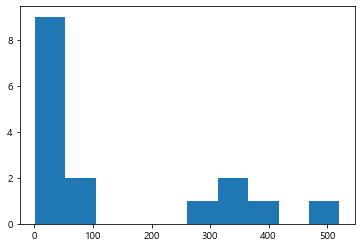

In [57]:
plt.hist(data=reviewed_selfdev_count, x='rating', bins=10)